In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


     |████████████████████████████████| 61kB 3.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=1e1b7ad660c27cd0adb0bffd48710f7bb4806e36a4d984c2938a4fbebeaa6553
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [2]:
!kaggle datasets download -d shreyas90999/mycasestudy02ee

100% 11.1G/11.1G [04:22<00:00, 27.4MB/s]
100% 11.1G/11.1G [04:22<00:00, 45.3MB/s]


In [3]:
!unzip /content/mycasestudy02ee.zip

Streaming output truncated to the last 5000 lines.
  inflating: women_trousers/image2735_3.jpg  
  inflating: women_trousers/image2736.json  
  inflating: women_trousers/image2736_0.jpg  
  inflating: women_trousers/image2736_1.jpg  
  inflating: women_trousers/image2736_2.jpg  
  inflating: women_trousers/image2736_3.jpg  
  inflating: women_trousers/image2736_4.jpg  
  inflating: women_trousers/image2737.json  
  inflating: women_trousers/image2737_0.jpg  
  inflating: women_trousers/image2737_1.jpg  
  inflating: women_trousers/image2737_2.jpg  
  inflating: women_trousers/image2737_3.jpg  
  inflating: women_trousers/image2737_4.jpg  
  inflating: women_trousers/image2738.json  
  inflating: women_trousers/image2738_0.jpg  
  inflating: women_trousers/image2738_1.jpg  
  inflating: women_trousers/image2738_2.jpg  
  inflating: women_trousers/image2738_3.jpg  
  inflating: women_trousers/image2738_4.jpg  
  inflating: women_trousers/image2739.json  
  inflating: women_trousers/image

In [4]:
import os 
os.remove('/content/mycasestudy02ee.zip')
os.remove('kaggle.json')

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from numpy.linalg import norm
import matplotlib.pyplot as plt
import pickle
import cv2
from tqdm import tqdm, tqdm_notebook
import os
import time
import gc
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [6]:
#https://www.oreilly.com/library/view/practical-deep-learning/9781492034858/ch04.html
resnet = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(512, 512, 3), pooling='max')
densenet = tf.keras.applications.DenseNet121(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(512,512,3),
    pooling='max')
def extract_features(img_path, model):
    input_shape = (512, 512, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

29089792/29084464 [==============================] - 0s 0us/step


In [7]:
a = extract_features('women_trousers/image59_4.jpg',resnet)
print('The Number of features with resnet {}'.format(len(a)))
a = extract_features('women_trousers/image59_4.jpg',densenet)
print('The Number of features with Densenet {}'.format(len(a)))

The Number of features with resnet 2048
The Number of features with Densenet 1024


<p> Here i tried with two pretrained models Resnet50, DenseNet Now i am choosing the Densenet which has 1024 features because Resnet50 has 2048 features <p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path = []
cat = []
for i in os.listdir('/content'):
  for j in os.listdir(i):
    if j.endswith('.jpg'):
      path.append(i+'/'+j)
      cat.append(i)

In [10]:
cat[:5]

['women_boots', 'women_boots', 'women_boots', 'women_boots', 'women_boots']

In [12]:
len(path),len(cat)

(75303, 75303)

In [13]:
#https://stackoverflow.com/questions/60584155/oserror-image-file-is-truncated
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [14]:
from tqdm import tqdm

In [15]:
def embedings(paths):
    return extract_features(paths,densenet)

In [16]:
result =[]
for i in tqdm(path):
  result.append(embedings(i))

100%|██████████| 75303/75303 [2:04:57<00:00, 10.04it/s]


In [17]:
len(result[0])

1024

## Check

In [18]:
all(embedings(path[100])==result[100])

True

In [19]:
final = {}
final['path'] = path
final['category'] =cat
final['embedings'] = result

In [21]:
pickle.dump(final,open('final_embeings.pkl','wb'))

In [3]:
a =  pickle.load( open("final_embeings.pkl", "rb" ) )

### Dividing embedings of Upperwear,LowerWear and Footwear

In [4]:
data = pd.DataFrame(a)

In [5]:
def For_Main(x):
    if any([x=='women_boots', x == 'women_casual_shoes' , x=='women_flats' , x=='women_heels']):
        return 'FootWear'
    if any([x=='women_jeans_jeggings',x=='women_shorts_skirts',x=='women_trousers']):
        return 'LowerWear'
    if x=='women_shirts_tops_tees':
        return 'UpperWear'

In [6]:
data['Main'] = [For_Main(i) for i in tqdm(data['category'])]

100%|███████████████████████████████████████████████████████████████████████| 75303/75303 [00:00<00:00, 1372833.45it/s]


In [ ]:
data.isnull()

In [10]:
data['Main'].unique()

array(['FootWear', 'LowerWear', 'UpperWear'], dtype=object)

In [11]:
lowerwear = data[data['Main']=='LowerWear']
lowerwear = {'Path':lowerwear.path.values,'Category':lowerwear.Main.values,'Embedings':lowerwear.embedings.values}
pickle.dump(lowerwear,open('lowerwear.pkl',"wb"))

In [12]:
UpperWear = data[data['Main']=='UpperWear']
UpperWear = {'Path':UpperWear.path.values,'Category':UpperWear.Main.values,'Embedings':UpperWear.embedings.values}
pickle.dump(UpperWear,open('UpperWear.pkl',"wb"))

In [13]:
FootWear = data[data['Main']=='FootWear']
FootWear = {'Path':FootWear.path.values,'Category':FootWear.Main.values,'Embedings':FootWear.embedings.values}
pickle.dump(FootWear,open('FootWear.pkl',"wb"))

In [14]:
len(FootWear['Path']),len(UpperWear['Path']),len(lowerwear['Path'])

(37019, 16623, 21661)

### UpperWear Models with NearsetNeighbours

In [91]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=50, algorithm='brute',metric='euclidean')
neighbors.fit(np.array(list(UpperWear['Embedings'])))

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=50)

In [92]:
distances, indices = neighbors.kneighbors([UpperWear['Embedings'][129]])

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image983_2.jpg


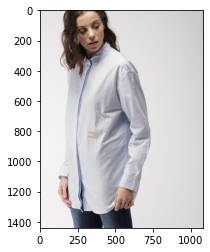

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2541_0.jpg


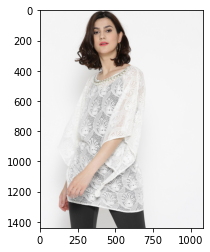

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2491_0.jpg


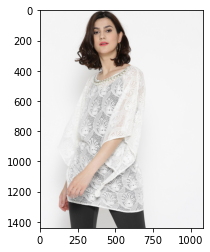

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2541_3.jpg


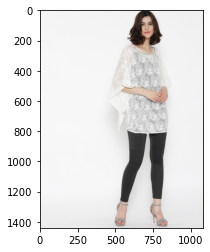

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2491_3.jpg


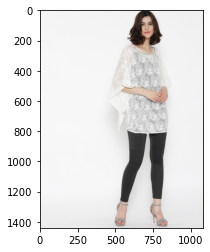

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2101_2.jpg


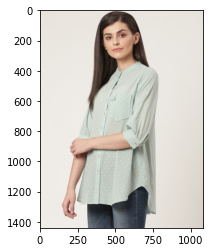

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2151_2.jpg


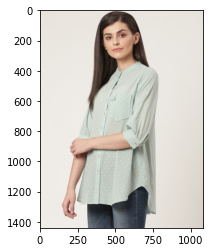

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2201_2.jpg


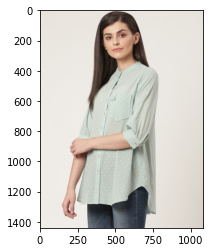

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image983_0.jpg


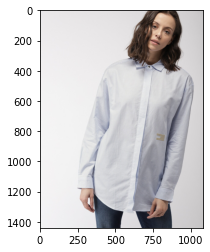

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2541_1.jpg


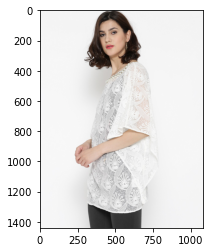

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2491_1.jpg


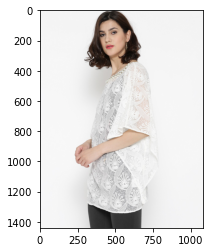

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2853_2.jpg


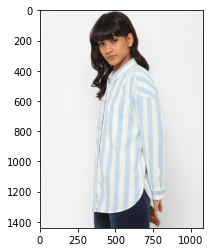

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2903_2.jpg


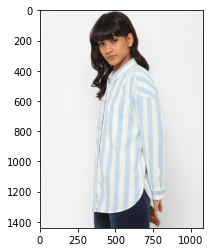

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2803_2.jpg


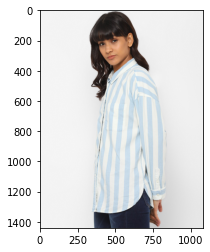

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2803_0.jpg


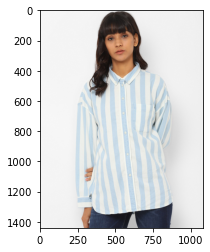

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image620_2.jpg


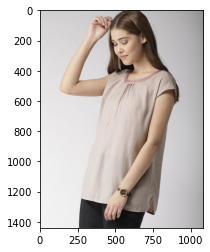

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image570_2.jpg


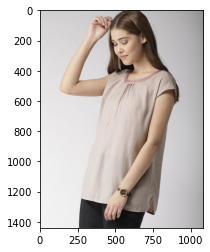

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image1806_0.jpg


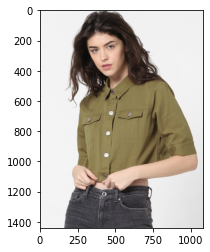

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image1856_0.jpg


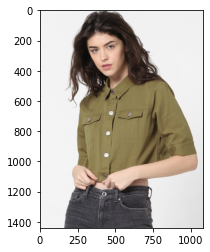

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image3174_4.jpg


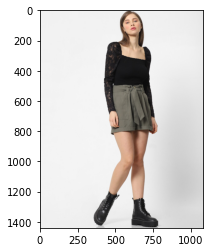

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2903_0.jpg


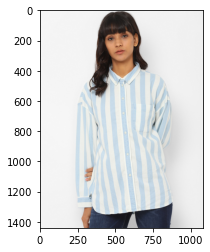

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2853_0.jpg


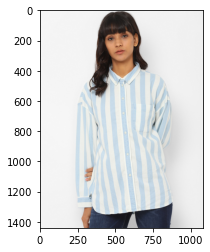

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image3501_2.jpg


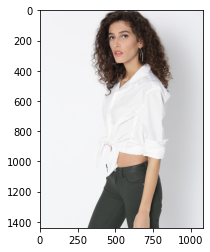

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image1505_2.jpg


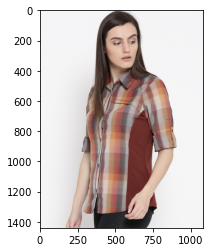

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image1555_2.jpg


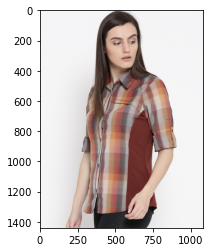

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image3310_0.jpg


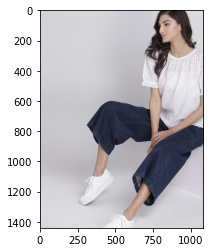

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image3210_0.jpg


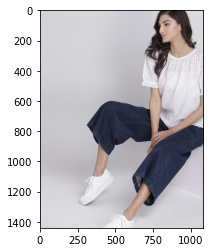

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image3260_0.jpg


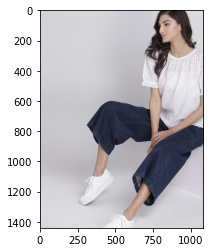

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2922_3.jpg


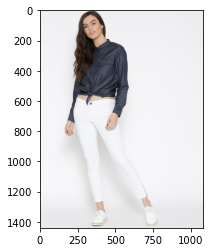

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2822_3.jpg


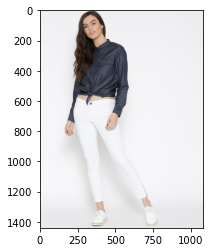

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2872_3.jpg


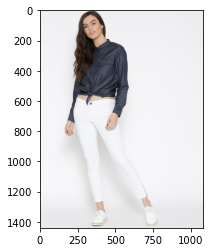

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image996_2.jpg


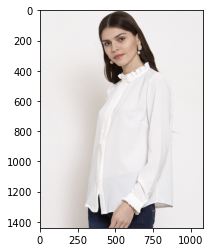

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image3860_0.jpg


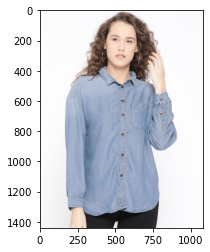

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image143_2.jpg


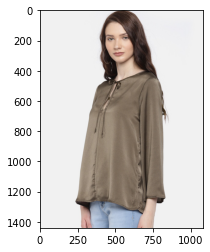

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image43_2.jpg


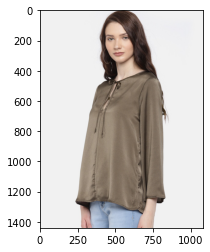

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image93_2.jpg


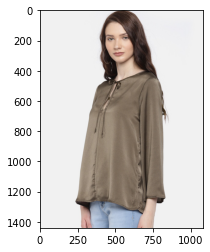

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2243_3.jpg


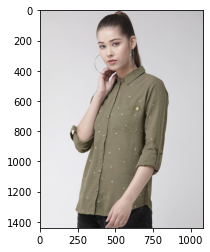

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2143_3.jpg


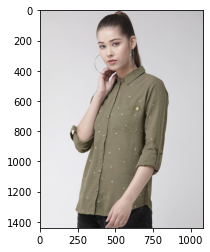

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2193_3.jpg


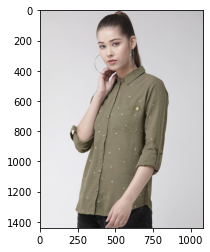

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image3910_0.jpg


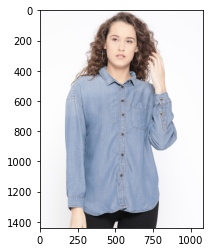

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2151_0.jpg


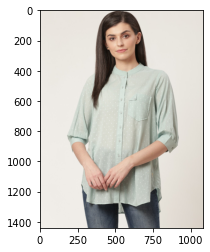

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2201_0.jpg


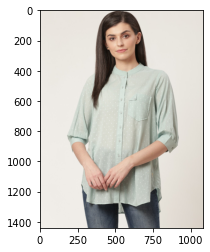

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2101_0.jpg


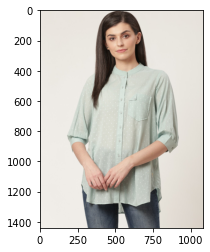

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image1545_4.jpg


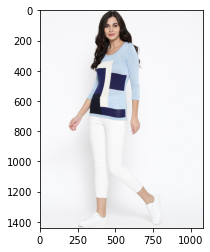

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image1595_4.jpg


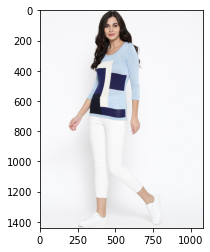

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2351_4.jpg


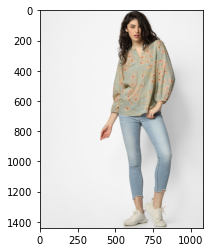

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image2401_4.jpg


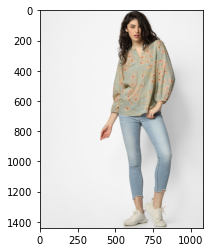

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image3573_5.jpg


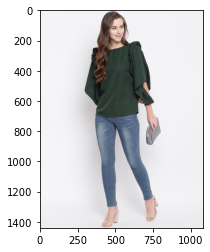

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image643_2.jpg


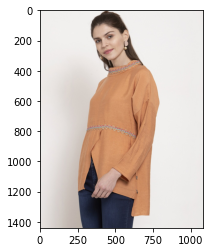

D:\Appliedaicourse\Casestudy2\data\women_shirts_tops_tees\image593_2.jpg


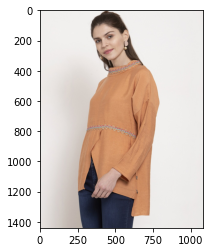

In [94]:
for i in indices[0][:]:
    print('D:\Appliedaicourse\Casestudy2\\data\\'+(UpperWear['Path'][i]).replace('/','\\'))
    img = cv2.imread('D:\Appliedaicourse\Casestudy2\\data\\'+(UpperWear['Path'][i]).replace('/','\\'))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [95]:
pickle.dump(neighbors,open('UpperModel.pkl','wb'))

### Lowerwear model with nearset Neighbors

In [96]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=50, algorithm='brute',metric='euclidean')
neighbors.fit(np.array(list(lowerwear['Embedings'])))

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=50)

In [99]:
distances, indices = neighbors.kneighbors([lowerwear['Embedings'][1209]])

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image797_1.jpg


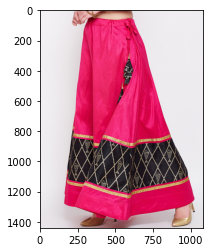

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image797_2.jpg


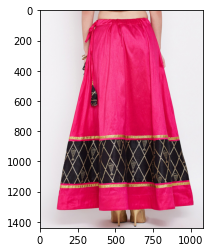

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image797_0.jpg


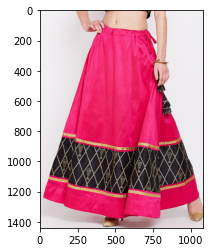

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image797_3.jpg


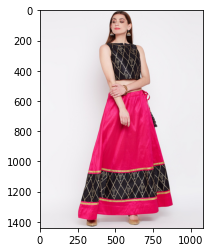

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1847_1.jpg


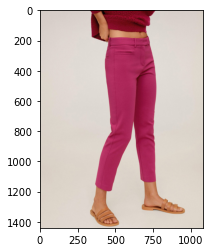

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1897_1.jpg


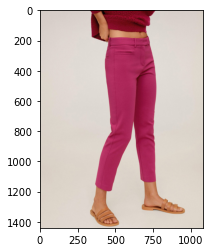

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1947_1.jpg


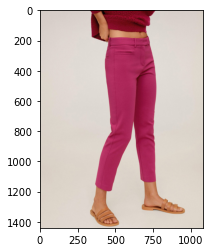

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image912_1.jpg


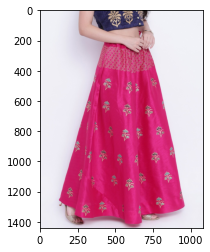

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image1029_0.jpg


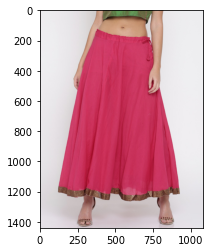

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image912_0.jpg


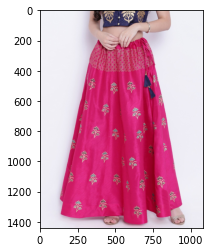

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image912_3.jpg


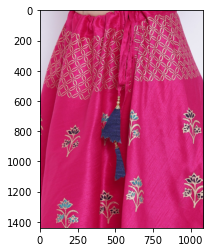

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image1029_1.jpg


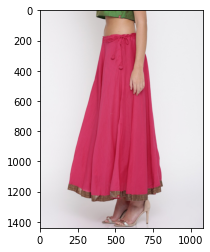

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1894_1.jpg


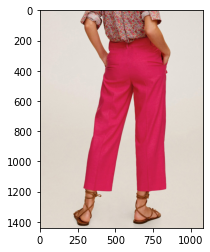

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1844_1.jpg


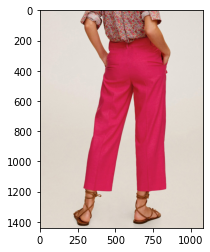

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1944_1.jpg


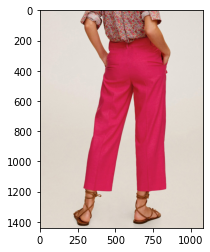

D:\Appliedaicourse\Casestudy2\data\women_trousers\image249_0.jpg


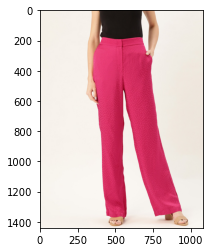

D:\Appliedaicourse\Casestudy2\data\women_trousers\image299_0.jpg


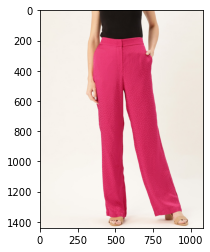

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image593_1.jpg


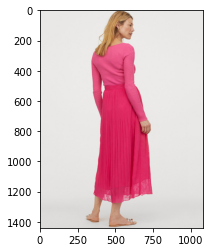

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image593_0.jpg


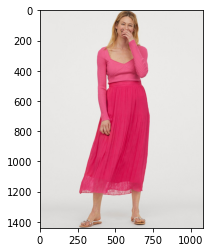

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image825_0.jpg


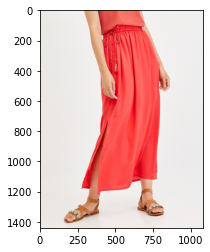

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1894_0.jpg


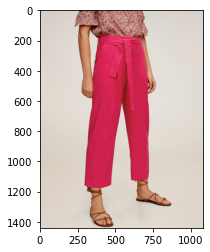

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1844_0.jpg


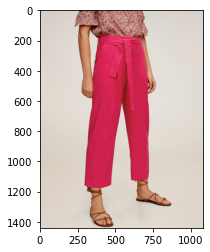

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1944_0.jpg


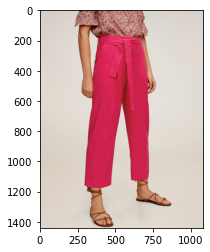

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1944_2.jpg


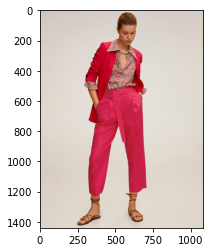

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1894_2.jpg


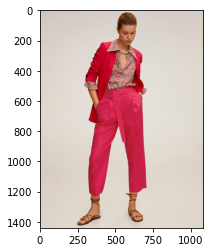

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1844_2.jpg


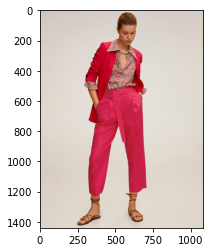

D:\Appliedaicourse\Casestudy2\data\women_trousers\image2006_3.jpg


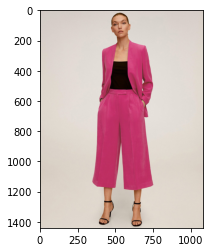

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1956_3.jpg


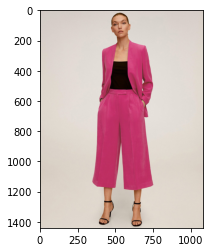

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image1029_2.jpg


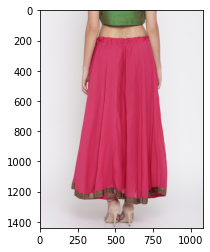

D:\Appliedaicourse\Casestudy2\data\women_trousers\image299_1.jpg


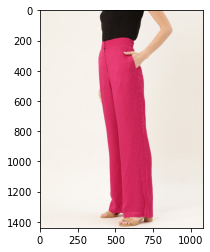

D:\Appliedaicourse\Casestudy2\data\women_trousers\image249_1.jpg


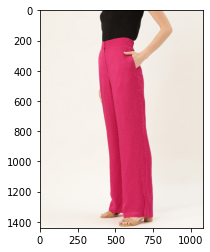

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image912_2.jpg


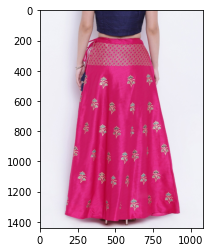

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image897_0.jpg


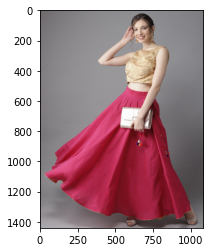

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image227_0.jpg


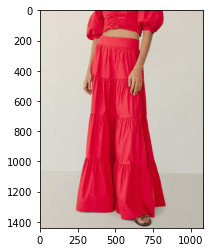

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image1029_3.jpg


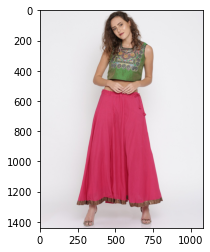

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1971_1.jpg


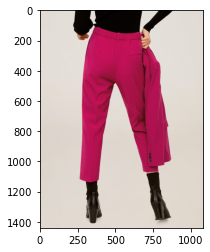

D:\Appliedaicourse\Casestudy2\data\women_trousers\image2021_1.jpg


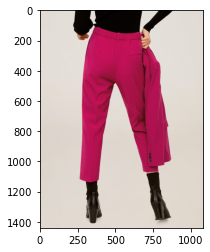

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image938_0.jpg


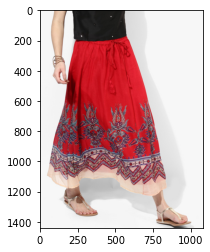

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image227_3.jpg


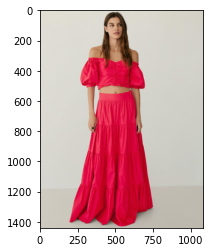

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image227_1.jpg


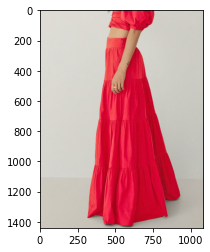

D:\Appliedaicourse\Casestudy2\data\women_trousers\image2006_0.jpg


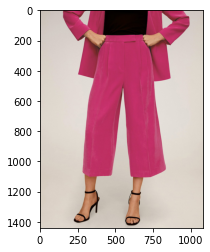

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1956_0.jpg


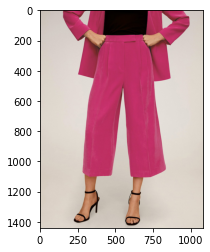

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1168_1.jpg


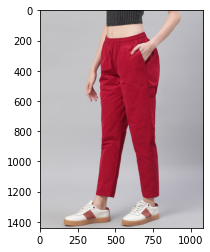

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image88_2.jpg


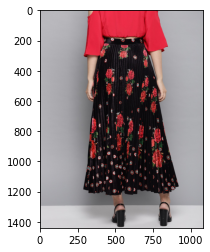

D:\Appliedaicourse\Casestudy2\data\women_shorts_skirts\image38_2.jpg


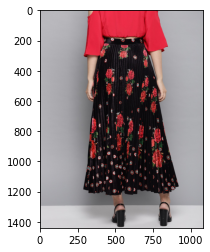

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1947_0.jpg


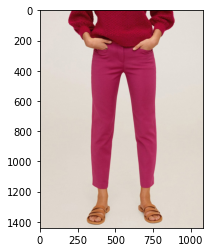

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1897_0.jpg


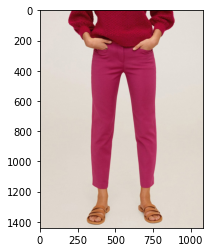

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1847_0.jpg


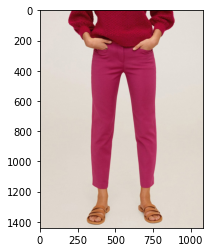

D:\Appliedaicourse\Casestudy2\data\women_trousers\image2006_2.jpg


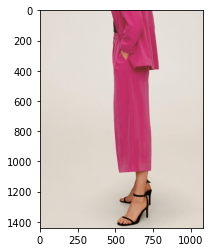

D:\Appliedaicourse\Casestudy2\data\women_trousers\image1956_2.jpg


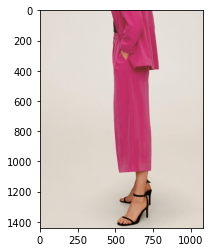

In [100]:
for i in indices[0][:]:
    print('D:\Appliedaicourse\Casestudy2\\data\\'+(lowerwear['Path'][i]).replace('/','\\'))
    img = cv2.imread('D:\Appliedaicourse\Casestudy2\\data\\'+(lowerwear['Path'][i]).replace('/','\\'))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [101]:
pickle.dump(neighbors,open('LowerModel.pkl','wb'))

### FootWear model with nearset Neighbors

In [102]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=50, algorithm='brute',metric='euclidean')
neighbors.fit(np.array(list(FootWear['Embedings'])))

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=50)

In [ ]:
distances, indices = neighbors.kneighbors([lowerwear['Embedings'][1603]])

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image1366_2.jpg


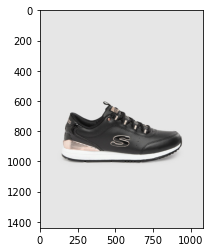

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image1316_2.jpg


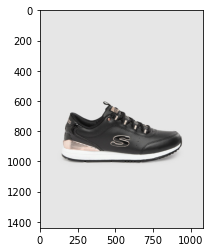

D:\Appliedaicourse\Casestudy2\data\women_flats\image197_1.jpg


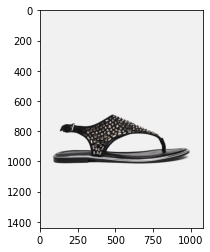

D:\Appliedaicourse\Casestudy2\data\women_flats\image247_1.jpg


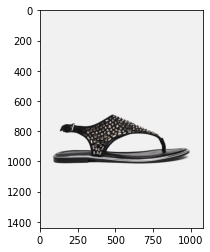

D:\Appliedaicourse\Casestudy2\data\women_flats\image147_1.jpg


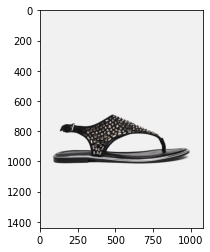

D:\Appliedaicourse\Casestudy2\data\women_flats\image412_4.jpg


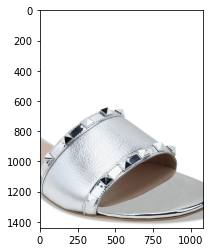

D:\Appliedaicourse\Casestudy2\data\women_flats\image462_4.jpg


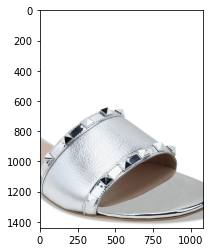

D:\Appliedaicourse\Casestudy2\data\women_flats\image1608_0.jpg


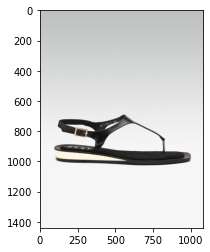

D:\Appliedaicourse\Casestudy2\data\women_flats\image1508_0.jpg


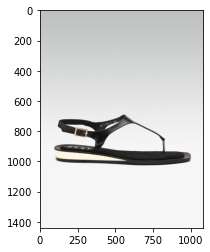

D:\Appliedaicourse\Casestudy2\data\women_flats\image1558_0.jpg


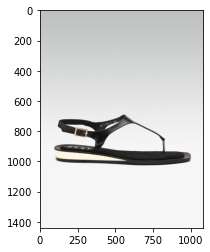

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image1048_2.jpg


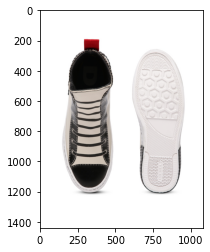

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image1098_2.jpg


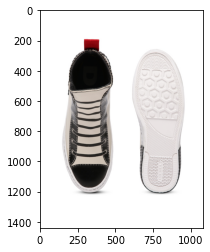

D:\Appliedaicourse\Casestudy2\data\women_heels\image787_5.jpg


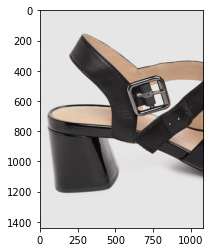

D:\Appliedaicourse\Casestudy2\data\women_heels\image737_5.jpg


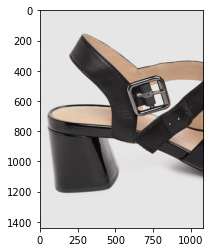

D:\Appliedaicourse\Casestudy2\data\women_flats\image1084_0.jpg


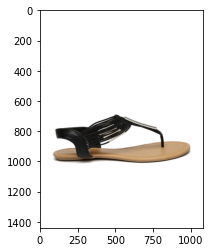

D:\Appliedaicourse\Casestudy2\data\women_boots\image520_4.jpg


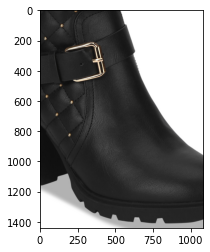

D:\Appliedaicourse\Casestudy2\data\women_boots\image470_4.jpg


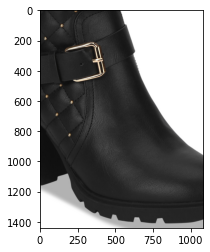

D:\Appliedaicourse\Casestudy2\data\women_flats\image1134_0.jpg


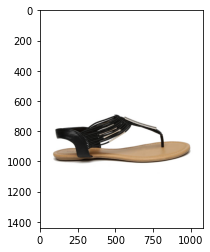

D:\Appliedaicourse\Casestudy2\data\women_flats\image1184_0.jpg


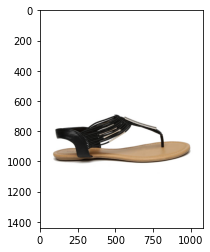

D:\Appliedaicourse\Casestudy2\data\women_flats\image1234_0.jpg


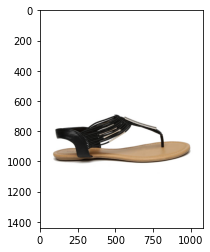

D:\Appliedaicourse\Casestudy2\data\women_flats\image1797_2.jpg


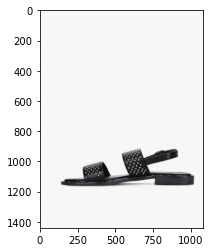

D:\Appliedaicourse\Casestudy2\data\women_flats\image1747_2.jpg


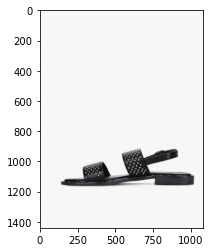

D:\Appliedaicourse\Casestudy2\data\women_heels\image1388_4.jpg


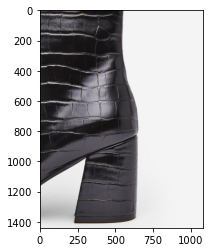

D:\Appliedaicourse\Casestudy2\data\women_heels\image1338_4.jpg


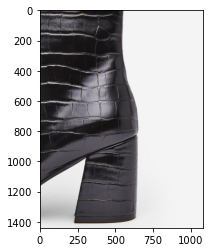

D:\Appliedaicourse\Casestudy2\data\women_heels\image1438_4.jpg


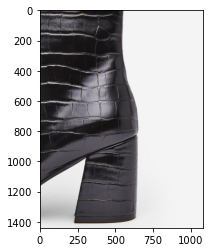

D:\Appliedaicourse\Casestudy2\data\women_boots\image293_4.jpg


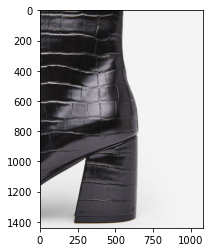

D:\Appliedaicourse\Casestudy2\data\women_boots\image243_4.jpg


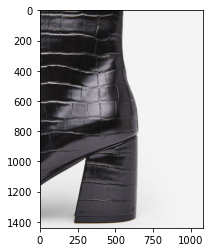

D:\Appliedaicourse\Casestudy2\data\women_heels\image1893_4.jpg


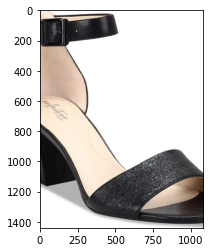

D:\Appliedaicourse\Casestudy2\data\women_heels\image1843_4.jpg


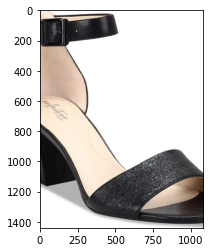

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image493_2.jpg


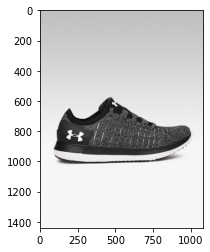

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image443_2.jpg


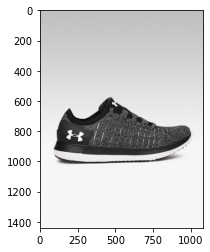

D:\Appliedaicourse\Casestudy2\data\women_flats\image1216_4.jpg


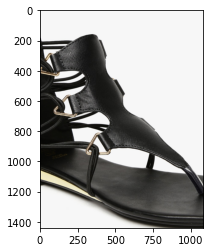

D:\Appliedaicourse\Casestudy2\data\women_flats\image1116_4.jpg


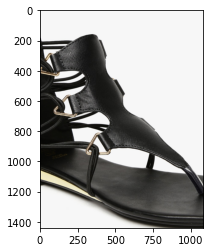

D:\Appliedaicourse\Casestudy2\data\women_flats\image1166_4.jpg


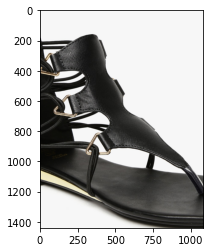

D:\Appliedaicourse\Casestudy2\data\women_boots\image332_4.jpg


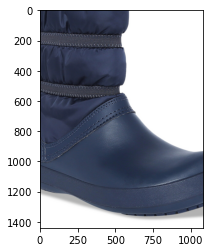

D:\Appliedaicourse\Casestudy2\data\women_flats\image1066_4.jpg


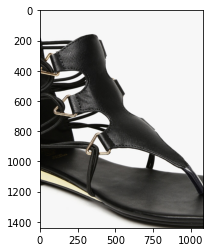

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image268_5.jpg


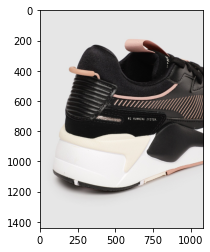

D:\Appliedaicourse\Casestudy2\data\women_boots\image366_2.jpg


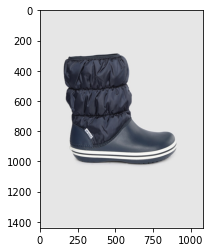

D:\Appliedaicourse\Casestudy2\data\women_boots\image416_2.jpg


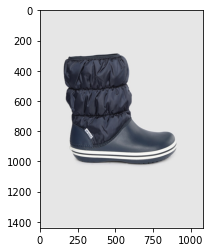

D:\Appliedaicourse\Casestudy2\data\women_flats\image1101_3.jpg


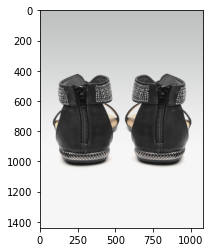

D:\Appliedaicourse\Casestudy2\data\women_flats\image1201_3.jpg


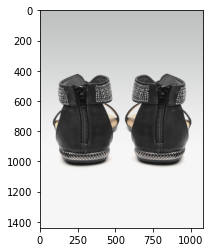

D:\Appliedaicourse\Casestudy2\data\women_flats\image1151_3.jpg


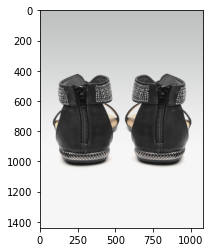

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image374_1.jpg


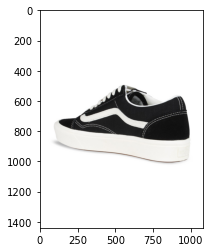

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image324_1.jpg


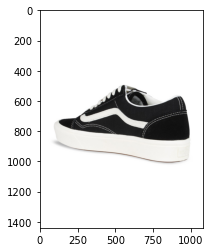

D:\Appliedaicourse\Casestudy2\data\women_flats\image1051_3.jpg


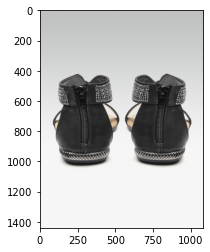

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image195_1.jpg


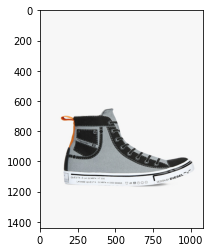

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image245_1.jpg


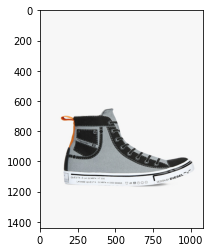

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image145_1.jpg


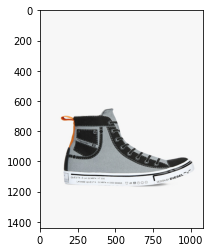

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image712_1.jpg


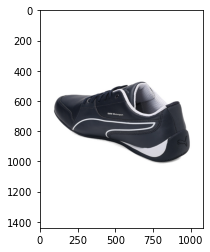

D:\Appliedaicourse\Casestudy2\data\women_casual_shoes\image762_1.jpg


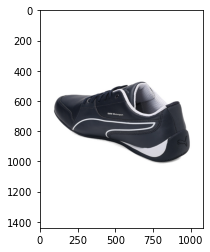

In [111]:
for i in indices[0][:]:
    print('D:\Appliedaicourse\Casestudy2\\data\\'+(FootWear['Path'][i]).replace('/','\\'))
    img = cv2.imread('D:\Appliedaicourse\Casestudy2\\data\\'+(FootWear['Path'][i]).replace('/','\\'))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [112]:
pickle.dump(neighbors,open('FootModel.pkl','wb'))